# Проект 03 - Визуализация данных

**Визуализация данных** — это ключевой этап анализа, который позволяет представлять информацию в графическом виде, чтобы облегчить понимание и заметить сложные закономерности в данных.

Библиотеки, с которыми ты познакомишься на этом проекте:

**Matplotlib** — стандартная библиотека для построения статических, анимированных и интерактивных визуализаций

**Seaborn** — высокоуровневая библиотека на основе matplotlib, предоставляющая удобный интерфейс для статистической графики

**Plotly** — библиотека для создания интерактивных графиков с поддержкой веб-приложений

**Missingno** - библиотека для работы с пропусками в данных



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

## Загрузка датасета

In [2]:
df = pd.read_csv('kaggle_survey_2018-2025.csv', low_memory=False)

In [3]:
df.head()

,in_which_country_do_you_currently_reside,cloud_azure,cloud_cloud,ide_ipython,languages_do_you_use_on_a_regular_basis_python,machine_learning_products_have_you_used_azure_machine_learning_studio,ide_notepad,languages_do_you_use_on_a_regular_basis_r,framework_lightgbm,activities_that_make_up_an_important_part_of_your_role_at_work_build_and_or_run_a_machine_learning_service_that_operationally_improves_my_product_or_workflows,...,database_server,data_udemy,activities_that_make_up_an_important_part_of_your_role_at_work_do_research_that_advances_the_state_of_the_art_of_machine_learning,hosted_notebooks_have_you_used_none,relational_database_products_have_you_used_none,data_machinelearning,tool_seaborn,ide_vim,age_sagemaker,languages_do_you_use_on_a_regular_basis_sql
0,United States of America,Microsoft Azure,NaN,Jupyter/IPython,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,Build and/or run a machine learning service th...,...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL
2,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,...,NaN,Udemy,NaN,NaN,NaN,NaN,Seaborn,NaN,NaN,NaN
3,United States of America,NaN,NaN,Jupyter/IPython,Python,NaN,NaN,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Seaborn,Vim,NaN,SQL
4,India,Microsoft Azure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL


## Красивое название столбцов

Мы заранее подготовим названия столбцов, чтобы дальше было проще с ними работать

In [4]:
column_name_mapper = {
    # Общая информация
    'in_which_country_do_you_currently_reside': 'Country',
    'age_years': 'Age (years)',
    'gender': 'Gender',
    'education_years': 'Years of Education',
    'title_retired': 'Job Title: Retired',
    'current_yearly_compensation': 'Yearly Compensation ($)',
    'survey_year': 'Survey Year',
    'duration_in_seconds': 'Survey Duration (seconds)',
    
    # Професиональные качества
    'year_school': 'Years of Experience/Education',
    'have_you_been_writing_code_to_analyze_data': 'Write Code for Data Analysis',
    'activities_that_make_up_an_important_part_of_your_role_at_work_build_and_or_run_a_machine_learning_service_that_operationally_improves_my_product_or_workflows': 'Activity: Build/Run ML Services',
    'activities_that_make_up_an_important_part_of_your_role_at_work_build_prototypes_to_explore_applying_machine_learning_to_new_areas': 'Activity: Build ML Prototypes',
    'activities_that_make_up_an_important_part_of_your_role_at_work_do_research_that_advances_the_state_of_the_art_of_machine_learning': 'Activity: ML Research',
    'activities_that_make_up_an_important_part_of_your_role_at_work_none_of_these_activities_are_an_important_part_of_my_role_at_work': 'Activity: Not ML-Related',
    
    # Языки программирования
    'languages_do_you_use_on_a_regular_basis_python': 'Language: Python',
    'languages_do_you_use_on_a_regular_basis_r': 'Language: R',
    'languages_do_you_use_on_a_regular_basis_java': 'Language: Java',
    'languages_do_you_use_on_a_regular_basis_matlab': 'Language: MATLAB',
    'languages_do_you_use_on_a_regular_basis_julia': 'Language: Julia',
    'languages_do_you_use_on_a_regular_basis_go': 'Language: Go',
    'languages_do_you_use_on_a_regular_basis_c_c': 'Language: C/C++',
    'languages_do_you_use_on_a_regular_basis_scala': 'Language: Scala',
    'languages_do_you_use_on_a_regular_basis_bash': 'Language: Bash',
    'languages_do_you_use_on_a_regular_basis_sql': 'Language: SQL',
    'languages_do_you_use_on_a_regular_basis_none': 'Language: None',
    'languages_do_you_use_on_a_regular_basis_other': 'Language: Other',
    
    # ML фреймворки
    'framework_pytorch': 'Framework: PyTorch',
    'framework_tensorflow': 'Framework: TensorFlow',
    'framework_xgboost': 'Framework: XGBoost',
    'framework_lightgbm': 'Framework: LightGBM',
    'framework_fastai': 'Framework: Fast.ai',
    'framework_learn': 'Framework: Learn',
    'frameworks_have_you_used_in_the_past_5_years_keras': 'Framework: Keras',
    'frameworks_have_you_used_in_the_past_5_years_caret': 'Framework: Caret',
    'frameworks_have_you_used_in_the_past_5_years_none': 'Framework: None',
    'frameworks_have_you_used_in_the_past_5_years_other': 'Framework: Other',
    
    # Виузализация
    'tool_matplotlib': 'Visualization: Matplotlib',
    'tool_seaborn': 'Visualization: Seaborn',
    'tool_plotly': 'Visualization: Plotly',
    'tool_ggplot2': 'Visualization: ggplot2',
    'tool_bokeh': 'Visualization: Bokeh',
    'tool_altair': 'Visualization: Altair',
    'tool_d3': 'Visualization: D3.js',
    'tool_shiny': 'Visualization: Shiny',
    'tool_leaflet': 'Visualization: Leaflet',
    'tool_geoplotlib': 'Visualization: Geoplotlib',
    'tool_none': 'Visualization: None',
    'tool_other': 'Visualization: Other',
    
    # IDE
    'ide_ipython': 'IDE: IPython/Jupyter',
    'ide_rstudio': 'IDE: RStudio',
    'ide_pycharm': 'IDE: PyCharm',
    'ide_spyder': 'IDE: Spyder',
    'ide_vim': 'IDE: Vim',
    'ide_matlab': 'IDE: MATLAB',
    'ide_code': 'IDE: VS Code',
    'ide_notepad': 'IDE: Notepad++',
    'ide_text': 'IDE: Text Editor',
    'ide_none': 'IDE: None',
    'ide_other': 'IDE: Other',
    
    # Облачные сервисы
    'cloud_aws': 'Cloud: AWS',
    'cloud_azure': 'Cloud: Azure',
    'cloud_gcp': 'Cloud: GCP',
    'cloud_cloud': 'Cloud: Cloud',
    'cloud_api': 'Cloud: API',
    'cloud_engine': 'Cloud: Engine',
    'cloud_sql': 'Cloud: SQL',
    'cloud_youtube': 'Cloud: YouTube',
    'cloud_computing_services_have_you_used_ibm_cloud': 'Cloud: IBM Cloud',
    
    # Базы данных
    'database_dynamodb': 'Database: DynamoDB',
    'database_postgressql': 'Database: PostgreSQL',
    'database_server': 'Database: Server',
    'database_database': 'Database: Database',
    'relational_database_products_have_you_used_mysql': 'Database: MySQL',
    'relational_database_products_have_you_used_sqlite': 'Database: SQLite',
    'relational_database_products_have_you_used_none': 'Database: None',
    'relational_database_products_have_you_used_other': 'Database: Other',
    
    # ML продукты
    'machine_learning_products_have_you_used_azure_machine_learning_studio': 'ML Service: Azure ML Studio',
    'machine_learning_products_have_you_used_sas': 'ML Service: SAS',
    'machine_learning_products_have_you_used_none': 'ML Service: None',
    'machine_learning_products_have_you_used_other': 'ML Service: Other',
    
    # Нотбуки
    'hosted_notebooks_have_you_used_azure_notebook': 'Notebook Hosting: Azure',
    'hosted_notebooks_have_you_used_paperspace': 'Notebook Hosting: Paperspace',
    'hosted_notebooks_have_you_used_none': 'Notebook Hosting: None',
    'hosted_notebooks_have_you_used_other': 'Notebook Hosting: Other',
    'notebook_datalab': 'Notebook: Datalab',
    'age_sagemaker': 'SageMaker Experience',
    
    # Обучающие ресурсы
    'data_learn': 'Learning: Learn',
    'data_courses': 'Learning: Courses',
    'data_coursera': 'Learning: Coursera',
    'data_udacity': 'Learning: Udacity',
    'data_udemy': 'Learning: Udemy',
    'data_edx': 'Learning: edX',
    'data_datacamp': 'Learning: DataCamp',
    'data_forums': 'Learning: Forums',
    'data_blog': 'Learning: Blogs',
    'data_publications': 'Learning: Publications',
    'data_machinelearning': 'Learning: Machine Learning',
    'data_data': 'Learning: Data',
    'data_decisions': 'Learning: Decisions',
    'data_etc': 'Learning: etc',
    'data_none': 'Learning: None',
    'data_other': 'Learning: Other',
    
    # Другое
    'ai_ai': 'AI',
    'method_business': 'Method: Business'
}

In [5]:
compensation_mapper = {
    'I do not wish to disclose my approximate yearly compensation': 0,
    'do not wish to disclose': 0,
    
    '0-10,000': 5000,
    '10-20,000': 15000,
    '20-30,000': 25000,
    '30-40,000': 35000,
    '40-50,000': 45000,
    '50-60,000': 55000,
    '60-70,000': 65000,
    '70-80,000': 75000,
    '80-90,000': 85000,
    '90-100,000': 95000,
    '100-125,000': 112500,
    '125-150,000': 137500,
    '150-200,000': 175000,
    '200-250,000': 225000,
    '250-300,000': 275000,
    '300-400,000': 350000,
    '400-500,000': 450000,
    
    '$0-999': 500,
    '1,000-1,999': 1500,
    '2,000-2,999': 2500,
    '3,000-3,999': 3500,
    '4,000-4,999': 4500,
    '5,000-7,499': 6250,
    '7,500-9,999': 8750,
    '10,000-14,999': 12500,
    '15,000-19,999': 17500,
    '20,000-24,999': 22500,
    '25,000-29,999': 27500,
    '30,000-39,999': 35000,
    '40,000-49,999': 45000,
    '50,000-59,999': 55000,
    '60,000-69,999': 65000,
    '70,000-79,999': 75000,
    '80,000-89,999': 85000,
    '90,000-99,999': 95000,
    '100,000-124,999': 112500,
    '125,000-149,999': 137500,
    '150,000-199,999': 175000,
    '200,000-249,999': 225000,
    '250,000-299,999': 275000,
    '300,000-499,999': 400000,
    '500,000-999,999': 750000,
    
    '> $500,000': 750000,
    '500,000+': 750000,
    '>$1,000,000': 1500000,
    '300,000-500,000': 400000,
}

In [6]:
gender_mapper = {
    'Male': 'Man',
    'Female': 'Woman',
    'Prefer not to say': 'Prefer to self-describe'
}

In [7]:
df = df.rename(columns=column_name_mapper)

In [8]:
df['Gender'] = df['Gender'].map(gender_mapper)

In [9]:
df['Yearly Compensation ($)'] = df['Yearly Compensation ($)'].map(compensation_mapper)

## Задача 1

Пропуски в данных могут сигнализировать о многом, поэтому нужно уметь работать с ними.

 1. При помощи библиотеки `missingno` построй матрицу пропущенных значений

 2. Выведи топ-20 столбцов с наибольшим количеством пропусков при помощи `matplotlib` или `seaborn`

<Figure size 1500x800 with 0 Axes>

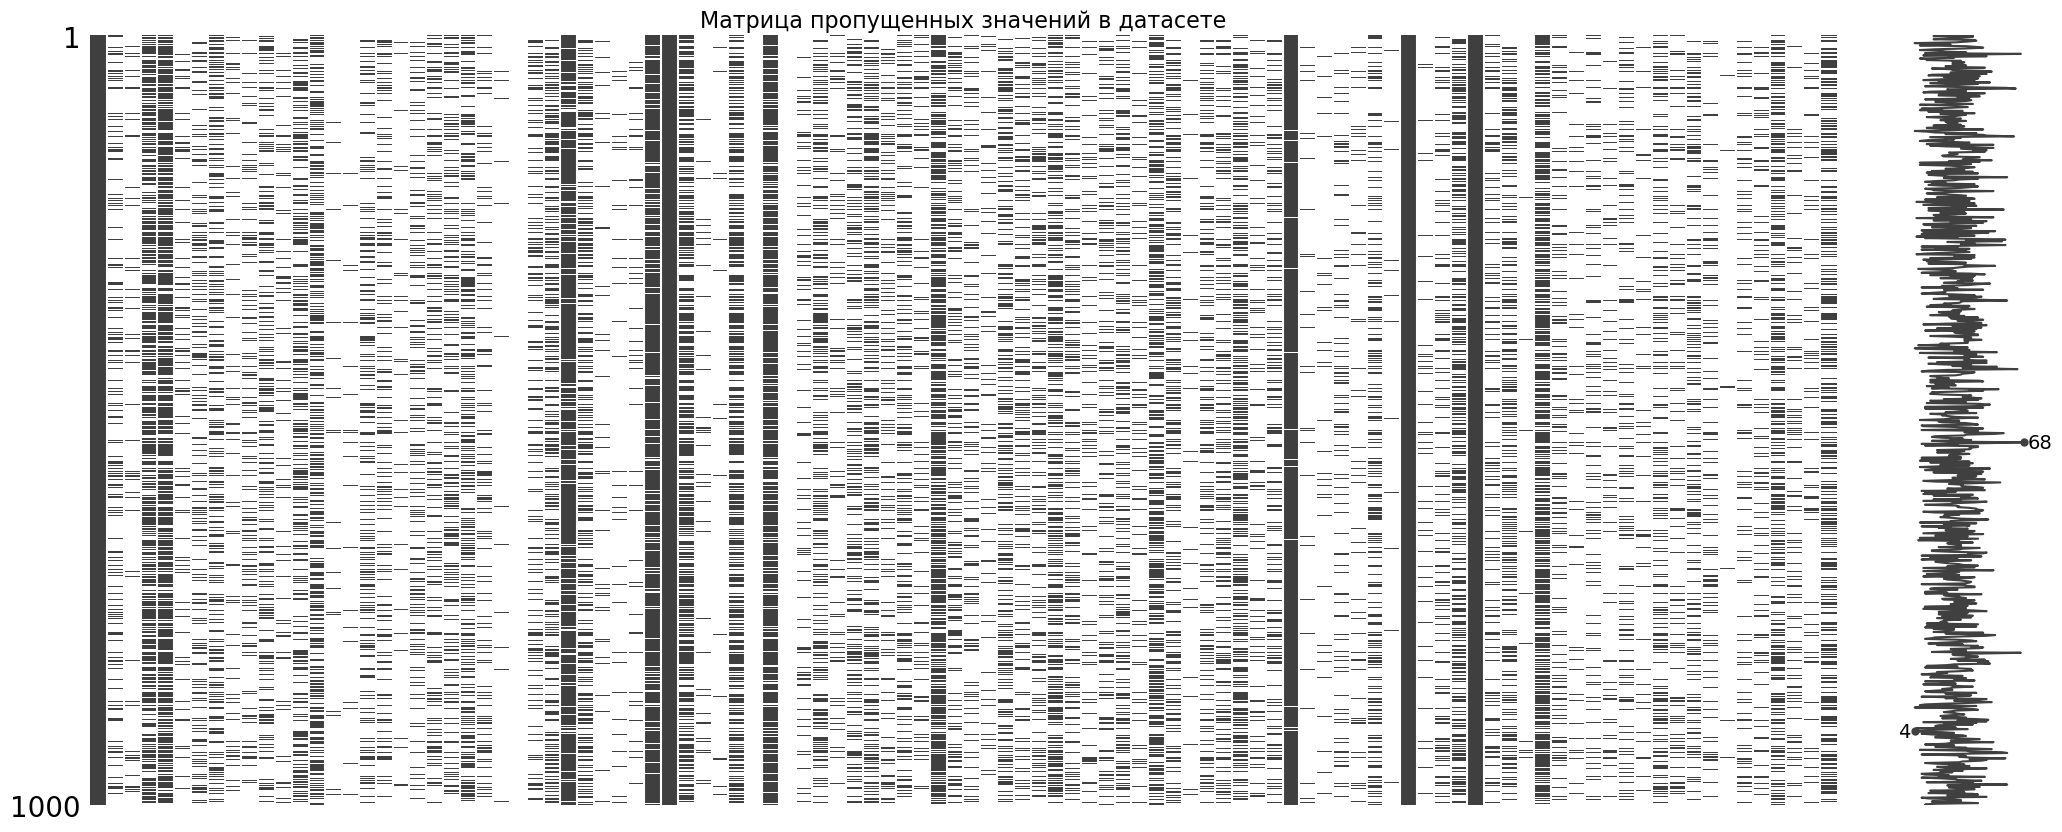

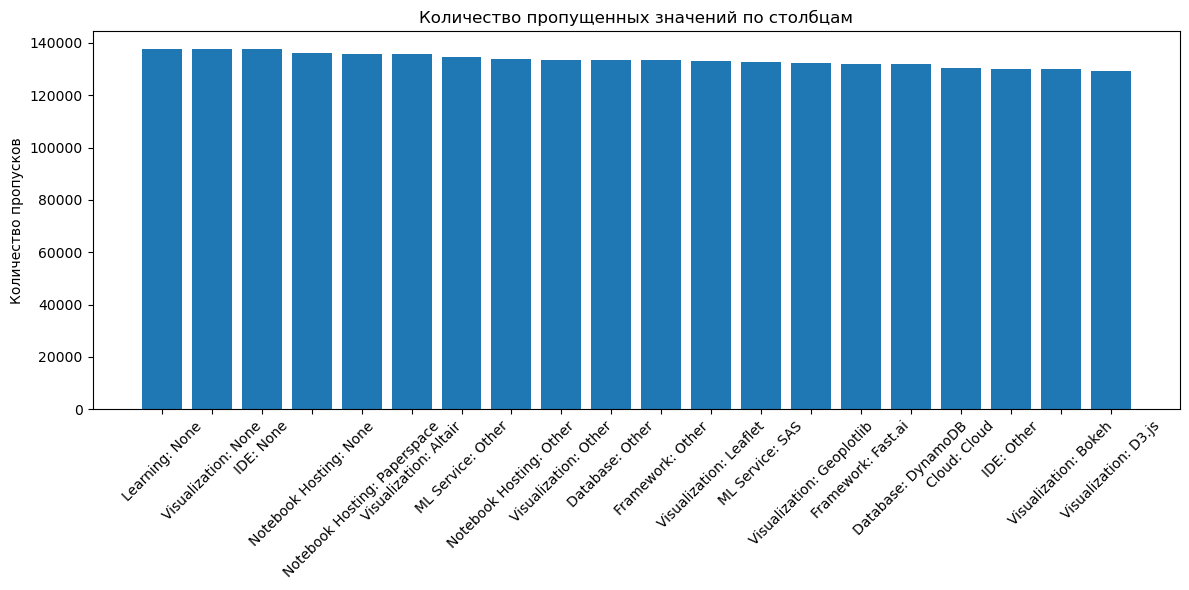

In [10]:
plt.figure(figsize=(15, 8))
msno.matrix(df.sample(1000))
plt.title('Матрица пропущенных значений в датасете', fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0][:20]
plt.bar(missing_data.index, missing_data.values)
plt.xticks(rotation=45)
plt.title('Количество пропущенных значений по столбцам')
plt.ylabel('Количество пропусков')
plt.tight_layout()
plt.show()

## Задача 2

Построение карты распределения респондентов по странам

1. Подготовка данных
- Взять столбец `Country` из DataFrame
- Посчитать количество респондентов из каждой страны
- Преобразовать результат в удобный формат таблицы

2. Создание карты
- Использовать `plotly.express.choropleth()`
- Указать столбец с названиями стран
- Настроить режим распознавания стран по названиям
- Задать цветовую шкалу в синих тонах
- Добавить заголовок карты

In [11]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Создаем карту
fig = px.choropleth(country_counts,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    color_continuous_scale='Blues',
                    title='Частота упоминания стран',
                    hover_name='country',
                    hover_data={'count': True, 'country': False})

fig.update_layout(
    width=1000,      # ширина в пикселях
    height=600,      # высота в пикселях
    autosize=False   # отключаем авторазмер
)

fig.show()

/var/folders/xm/26cyvkjj6m73l2czg3_7g9th0000gn/T/ipykernel_7567/3355562057.py:5: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(country_counts,


## Задача 3

Построение точечного графика: Зарплата vs Возраст по полу

1. Подготовка данных
- Выбрать из DataFrame три столбца:
  - `Yearly Compensation ($)` - годовая зарплата
  - `Age (years)` - возраст
  - `Gender` - пол
- Создать копию данных для работы
- Удалить строки с пропущенными значениями

2. Построение графика
- Использовать `plotly.express.scatter()`
- Настроить оси:
  - X: Возраст (лет)
  - Y: Годовая зарплата ($)
- Разделить точки по цвету в зависимости от пола
- Добавить заголовок и подписи осей
- Настроить прозрачность точек


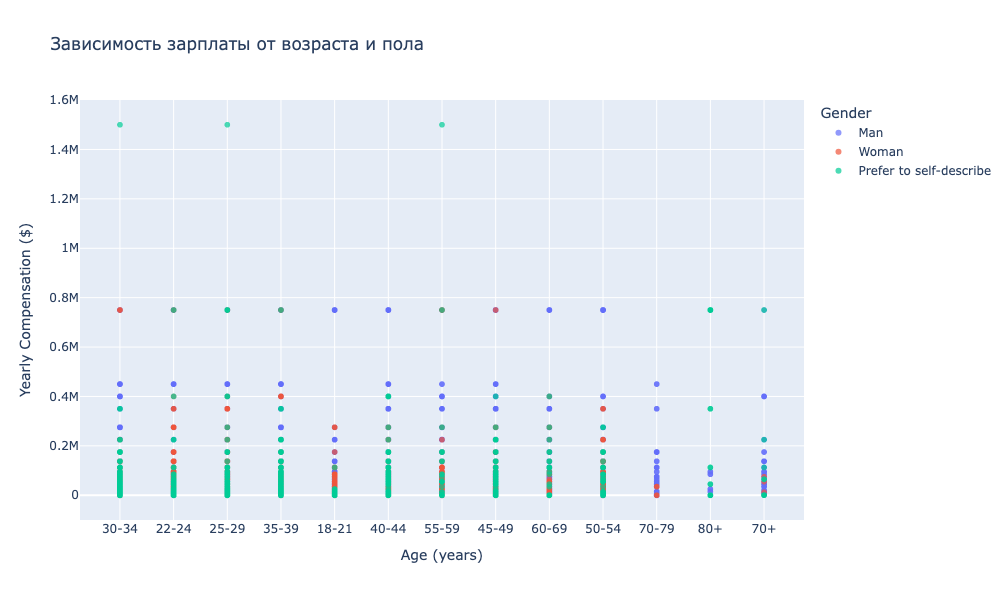

In [12]:
scatter_data = df[['Yearly Compensation ($)', 'Age (years)', 'Gender']].copy()

scatter_data = scatter_data.dropna()

fig = px.scatter(scatter_data, x='Age (years)', y='Yearly Compensation ($)', color='Gender',
                 title='Зависимость зарплаты от возраста и пола',
                 labels={'age': 'Возраст (лет)', 'compensation': 'Годовая компенсация ($)'},
                 opacity=0.7)
fig.update_layout(
    width=1000,      # ширина в пикселях
    height=600,      # высота в пикселях
    autosize=False   # отключаем авторазмер
)
fig.show()

## Задача 4

Анализ динамики использования AI/ML фреймворков по годам

1. Подготовка данных
- Выбрать 4 столбца с фреймворками ML:
  - PyTorch
  - TensorFlow 
  - XGBoost
  - LightGBM
- Сгруппировать данные по году опроса
- Посчитать количество использований каждого фреймворка по годам
- Добавить общее количество респондентов за каждый год

2. Расчет процентного соотношения
- Для каждого фреймворка рассчитать процент использования
- Формула: (количество использований / общее число респондентов) × 100
- Это позволяет сравнивать популярность фреймворков независимо от размера выборки

3. Построение графика
- Использовать `matplotlib` и `seaborn`
- Создать линейный график с маркерами для каждого фреймворка
- По оси X - годы проведения опроса
- По оси Y - процент использования фреймворка

4. Настройка визуализации
- Добавить заголовок и подписи осей
- Настроить легенду с названиями фреймворков
- Добавить сетку для удобства чтения

In [13]:
ml_products = ['Framework: PyTorch', 'Framework: TensorFlow', 'Framework: XGBoost', 'Framework: LightGBM']

yearly_usage = df.groupby('Survey Year')[ml_products].count().reset_index()
total_respondents = df.groupby('Survey Year').size().reset_index(name='total')
yearly_usage = yearly_usage.merge(total_respondents, on='Survey Year')

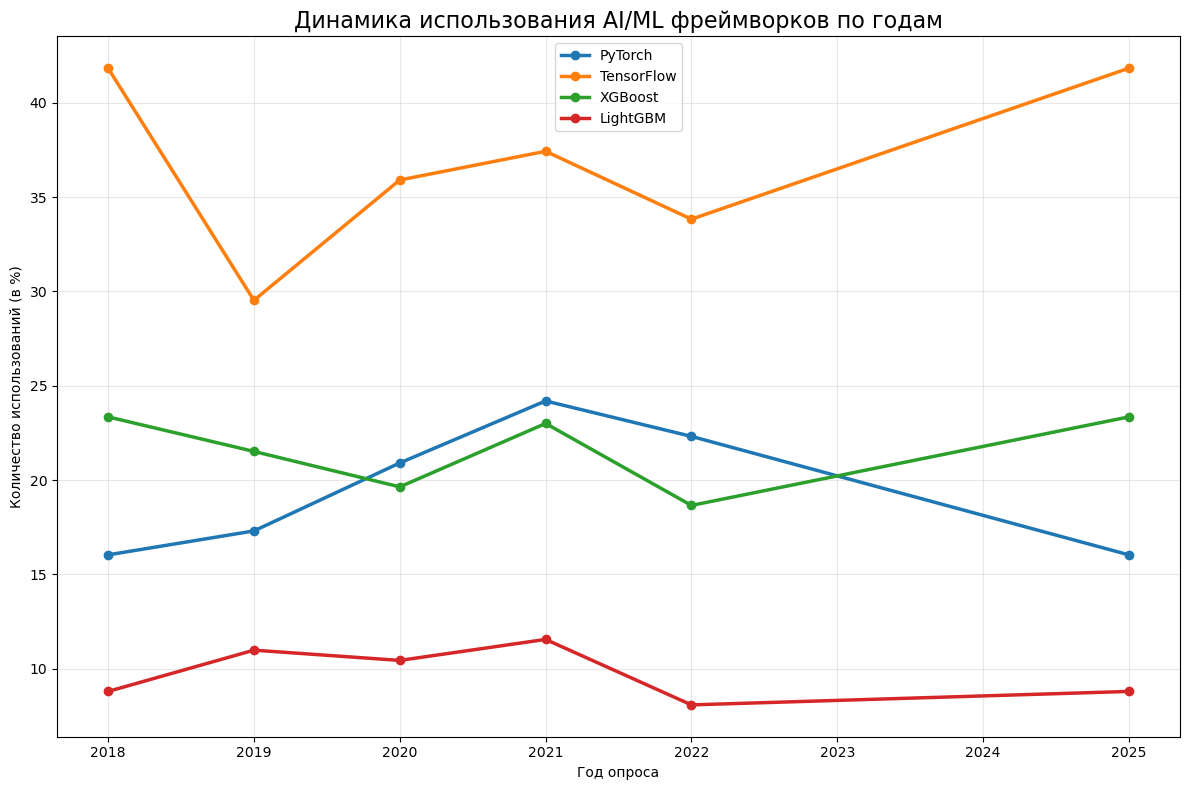

In [14]:
# Визуализация с Seaborn
plt.figure(figsize=(12, 8))
for product in ml_products:
    plt.plot(yearly_usage['Survey Year'], yearly_usage[product] / yearly_usage['total'] * 100, 
             marker='o', linewidth=2.5, label=product.replace('Framework: ', ''))

plt.title('Динамика использования AI/ML фреймворков по годам', fontsize=16)
plt.xlabel('Год опроса')
plt.ylabel('Количество использований (в %)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()